In [ ]:
Name - Nalawade Prafulla Chandrashekhar.
Class - BE Artificial Intelligence and Data Science.
Roll No. - 42
Practical No.04 - Clustering Analysis.
                  Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters 
                  using the elbow method. 

In [1]:
# Import Required Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [3]:
# Load the Iris Dataset.

In [4]:
df = pd.read_csv(r"C:\Users\pra\Downloads\Iris (1).csv")

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
len(df)

150

In [9]:
df.shape

(150, 6)

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
for i, col in enumerate(df.columns):
    print(f'coloumn number {1+i} is {col}')

coloumn number 1 is Id
coloumn number 2 is SepalLengthCm
coloumn number 3 is SepalWidthCm
coloumn number 4 is PetalLengthCm
coloumn number 5 is PetalWidthCm
coloumn number 6 is Species


In [13]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
# Checking the Missing Values.

In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.drop('Id', axis = 1, inplace = True)

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# K - Means Clustering.

In [22]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [24]:
# Splitting into Training and Target Data

# Target Data
target_data = df.iloc[:, 4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [27]:
# Training Data
clustering_data = df.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


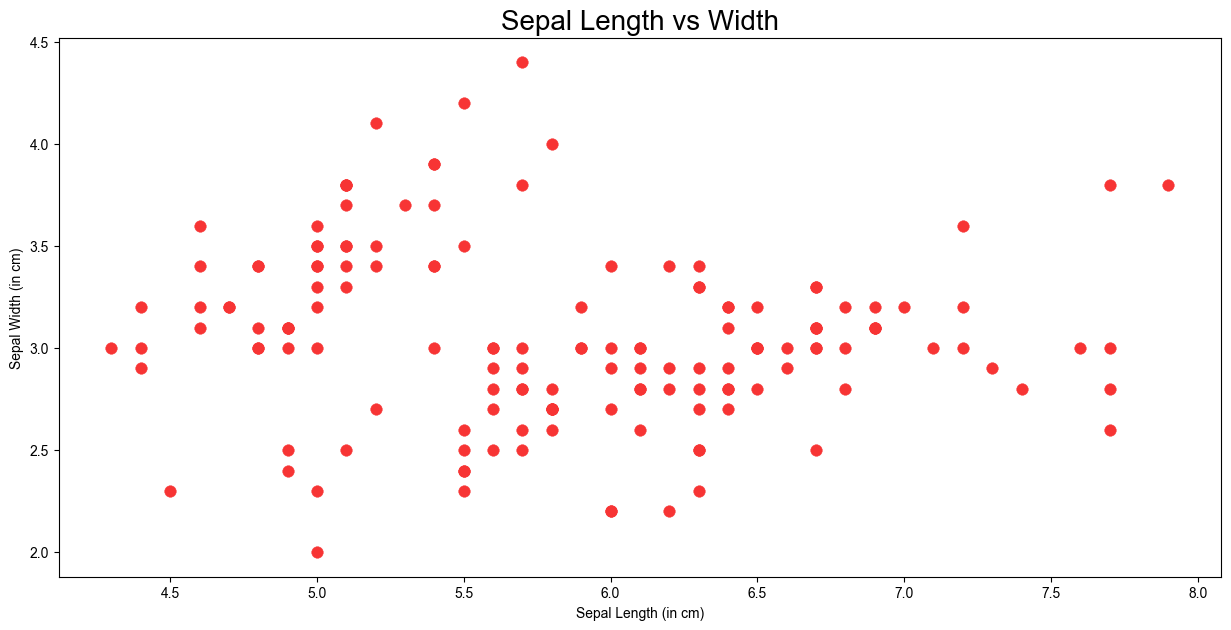

In [29]:
fig, ax = plt.subplots(figsize = (15,7))
sns.set(font_scale = 1.5)
ax = sns.scatterplot(x = df['SepalLengthCm'], y = df['SepalWidthCm'], s = 70, color = '#f73434', edgecolor = '#f73434', linewidth = 0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

In [30]:
# The Elbow Method.

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.53558205,  38.93096305,  34.42194767,  29.88140221,
        28.3706789 ,  26.10448016])

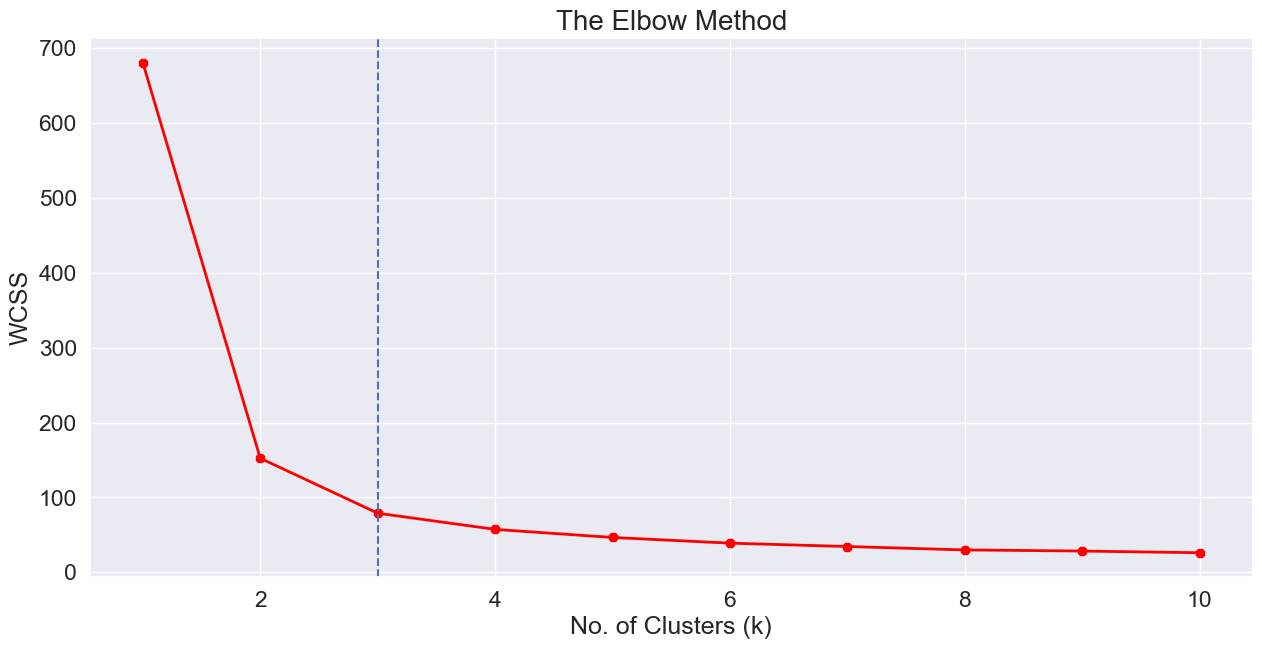

In [49]:
fig, ax = plt.subplots(figsize = (15, 7))
ax = plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.axvline(x = 3, ls = '--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()


In [50]:
# Clusters.

In [51]:
kms = KMeans(n_clusters = 3, init = 'k-means++')
kms.fit(clustering_data)
KMeans(n_clusters = 3)
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [52]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

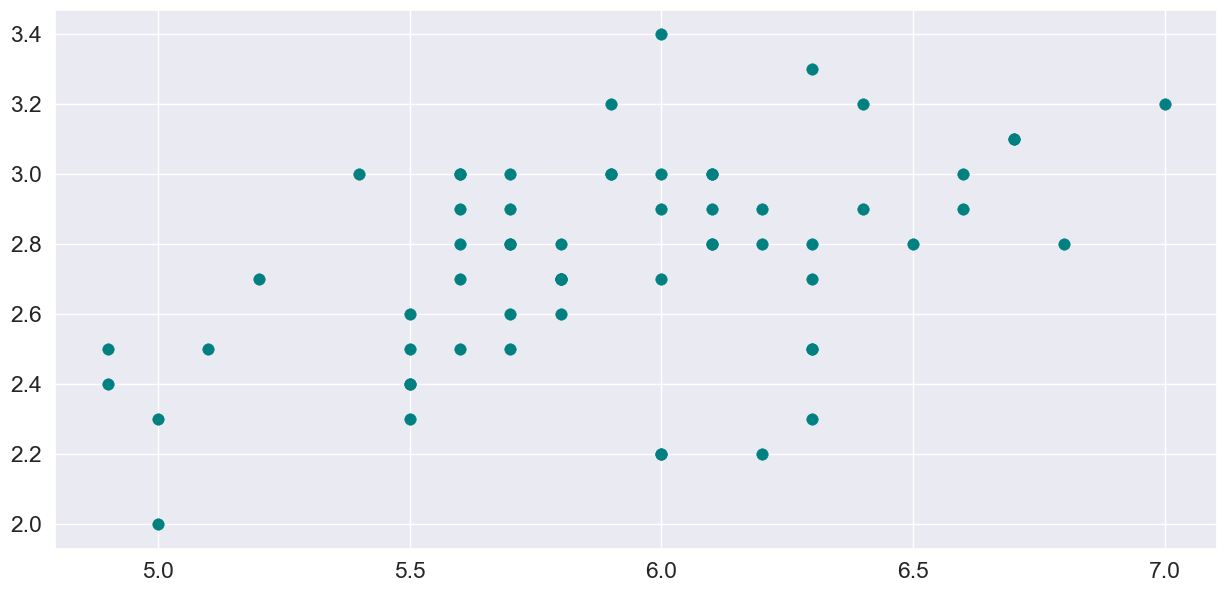

In [53]:
fig, ax = plt.subplots(figsize = (15,7))
plt.scatter(x = clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
           y = clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
           s = 70, edgecolor = 'teal', linewidth = 0.3, c = 'teal', label = 'Iris-versicolor')

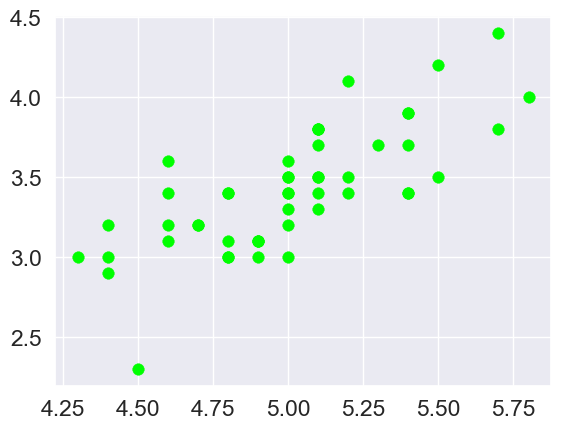

In [54]:
plt.scatter(x = clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
           y = clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
           s = 70, edgecolor = 'lime', linewidth = 0.3, c = 'lime', label = 'Iris-setosa')

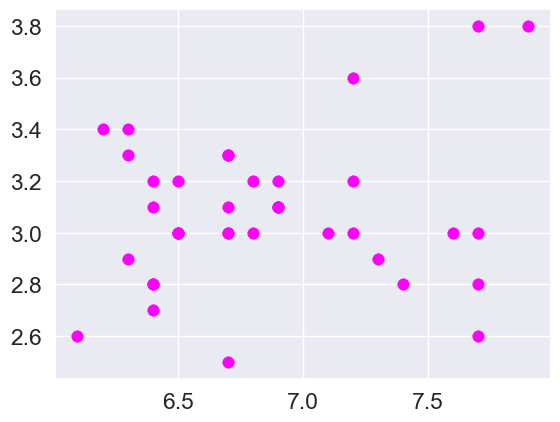

In [55]:
plt.scatter(x = clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
           y = clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
           s = 70, edgecolor = 'magenta', linewidth = 0.3, c = 'magenta', label = 'Iris-virginica')

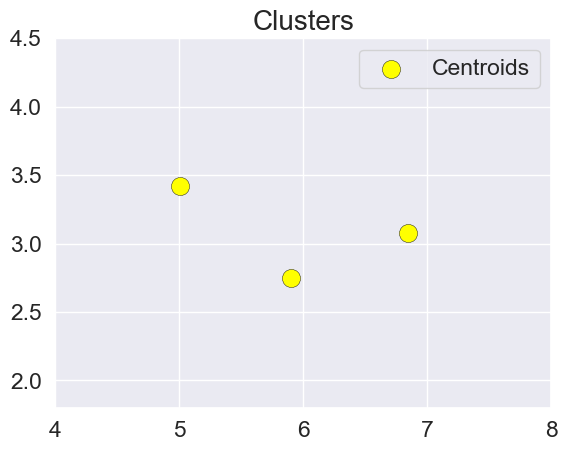

In [56]:
plt.scatter(x = kms.cluster_centers_[:, 0], y = kms.cluster_centers_[:, 1], s = 170, c = 'yellow', 
            label = 'Centroids', edgecolor = 'black', linewidth = 0.3)
plt.legend(loc = 'upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length(in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()